In [8]:
import scimap as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import anndata as ad

In [6]:
df = pd.read_parquet('../data/quantification/1002_quantification_filtered.parquet')

In [5]:
!pip install pyarrow

  Using cached pyarrow-17.0.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (3.3 kB)
Using cached pyarrow-17.0.0-cp310-cp310-macosx_11_0_arm64.whl (27.2 MB)


In [7]:
df.head()

,CellID,std_750_bg,std_647_bg,std_555_bg,std_488_bg,std_DAPI_bg,std_Vimentin,std_CD3e,std_panCK,std_CD8,...,Orientation,Extent,Solidity,Area_bot001,Area_top001,dapi_ratio_log,dapi_ratio,DAPI_drop,dapi_ratio_log_bot,dapi_ratio_log_top
0,1291507,43.653906,68.351369,87.515577,842.273883,49.493035,29.815214,28.141248,7.738013,103.225352,...,-0.768288,107.882251,0.953297,False,False,-0.014212,0.967805,False,False,False
1,699127,42.871139,154.433590,228.268141,859.815941,59.570325,14.352334,35.184255,52.015561,149.601616,...,-0.143431,86.627417,0.952652,False,False,0.085514,1.217627,False,False,False
2,941360,40.679133,62.451953,65.394948,456.502288,210.547125,35.411106,41.996041,10.067962,87.644964,...,-0.617794,159.580736,0.963318,False,False,0.069300,1.173005,False,False,False
3,403456,42.846745,134.978190,185.528345,1754.847237,69.805333,4.914173,25.139613,4.256393,390.191788,...,-0.022247,95.876154,0.953968,False,False,0.119339,1.316250,False,False,False
4,886914,46.737945,64.042010,70.467670,255.284634,43.259616,11.690079,21.031594,3.511639,54.992633,...,0.487502,76.905592,0.965937,False,False,-0.036855,0.918639,False,False,False


In [9]:
df.columns

Index(['CellID', 'std_750_bg', 'std_647_bg', 'std_555_bg', 'std_488_bg',
       'std_DAPI_bg', 'std_Vimentin', 'std_CD3e', 'std_panCK', 'std_CD8',
       'std_DAPI_1', 'std_COL1A1', 'std_CD20', 'std_CD68', 'std_Ki67',
       'std_DAPI_2', 'mean_750_bg', 'mean_647_bg', 'mean_555_bg',
       'mean_488_bg', 'mean_DAPI_bg', 'mean_Vimentin', 'mean_CD3e',
       'mean_panCK', 'mean_CD8', 'mean_DAPI_1', 'mean_COL1A1', 'mean_CD20',
       'mean_CD68', 'mean_Ki67', 'mean_DAPI_2', 'quantile25_750_bg',
       'quantile25_647_bg', 'quantile25_555_bg', 'quantile25_488_bg',
       'quantile25_DAPI_bg', 'quantile25_Vimentin', 'quantile25_CD3e',
       'quantile25_panCK', 'quantile25_CD8', 'quantile25_DAPI_1',
       'quantile25_COL1A1', 'quantile25_CD20', 'quantile25_CD68',
       'quantile25_Ki67', 'quantile25_DAPI_2', 'quantile50_750_bg',
       'quantile50_647_bg', 'quantile50_555_bg', 'quantile50_488_bg',
       'quantile50_DAPI_bg', 'quantile50_Vimentin', 'quantile50_CD3e',
       'quantile50_pa

In [10]:
#select columns by slicing the dataframe
data = df.iloc[:, 1:-16]

In [13]:
data.shape

(105764, 75)

In [15]:
meta = df.iloc[:, -16:]
#append the first column to the meta data
meta['CellID'] = df.iloc[:, 0]

In [16]:
meta.columns

Index(['Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity',
       'Area_bot001', 'Area_top001', 'dapi_ratio_log', 'dapi_ratio',
       'DAPI_drop', 'dapi_ratio_log_bot', 'dapi_ratio_log_top', 'CellID'],
      dtype='object')

In [17]:
adata = ad.AnnData(data, obs=meta)

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning:

Transforming to str index.



In [19]:
adata.write_h5ad('../data/quantification/1002_quantification_filtered.h5ad')

## unsupervised clustering

In [23]:
adata.var

""
std_750_bg
std_647_bg
std_555_bg
std_488_bg
std_DAPI_bg
...
quantile75_COL1A1
quantile75_CD20
quantile75_CD68
quantile75_Ki67


In [22]:
adata.X.shape

(105764, 75)

In [26]:
adata.raw = adata

In [27]:
adata = sm.pp.log1p(adata)

In [29]:
adata

AnnData object with n_obs × n_vars = 105764 × 75
    obs: 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'Area_bot001', 'Area_top001', 'dapi_ratio_log', 'dapi_ratio', 'DAPI_drop', 'dapi_ratio_log_bot', 'dapi_ratio_log_top', 'CellID'
    layers: 'log'

In [31]:
adata = sm.tl.cluster(adata, method='leiden', resolution=0.5, use_raw=False, log=False, n_pcs=15)

Leiden clustering


/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning:

Setting element `.obsm['X_pca']` of view, initializing view as actual.

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/tools/cluster.py:174: FutureWarning:

In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.



In [32]:
adata.obs['leiden'].value_counts()

leiden
0     13073
1     11457
2     11415
3     11041
4      9599
5      8689
6      8395
7      8176
8      7373
9      6578
10     5705
11     3335
12      892
13       36
Name: count, dtype: int64

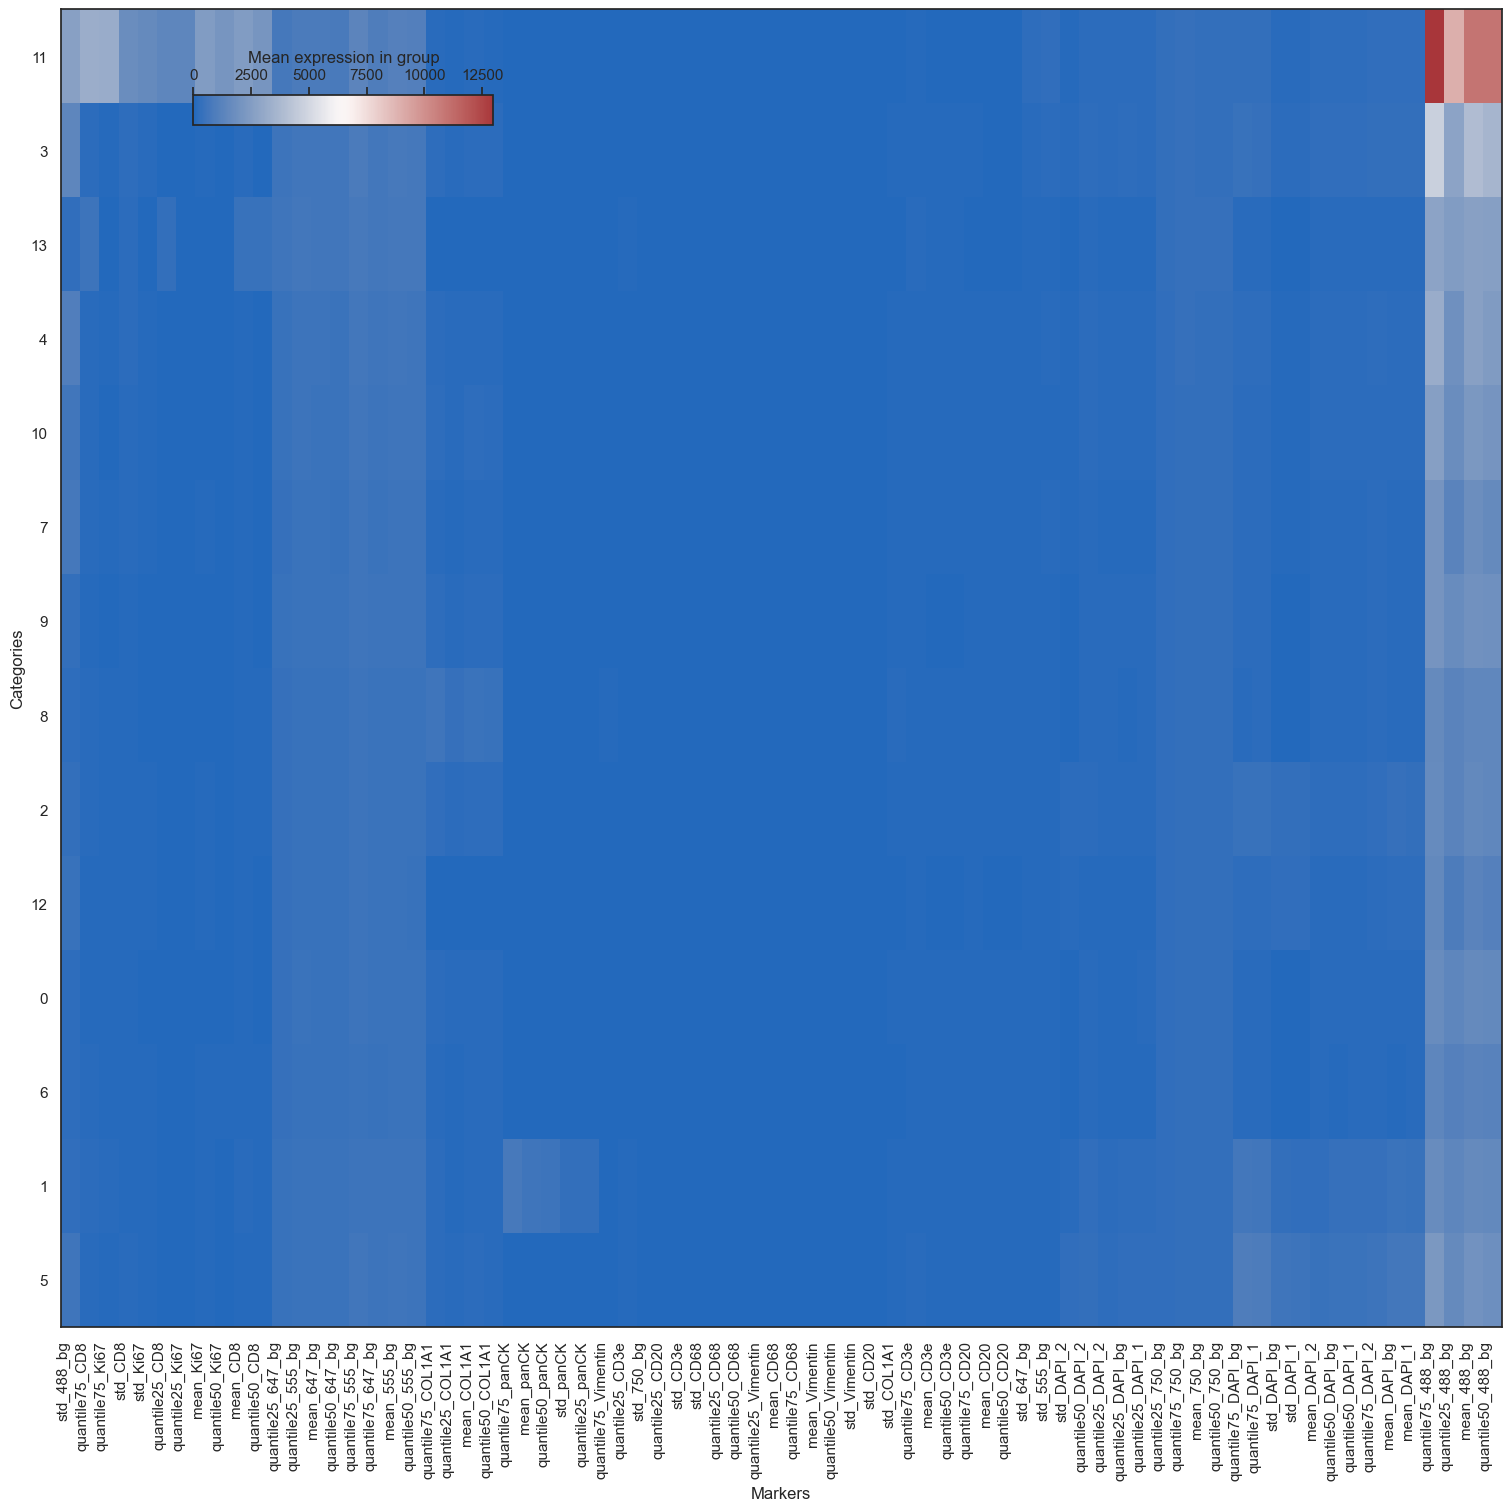

In [38]:
sm.pl.heatmap(adata, groupBy='leiden', figsize=(15,15), saveDir=None, fileName=None)

In [40]:
#have to remove background metrics, DAPI metrics
adata = adata[:, ~adata.var_names.str.contains('bg')]
adata = adata[:, ~adata.var_names.str.contains('DAPI')]

In [42]:
sm.tl.cluster(adata, method='leiden', resolution=0.5, use_raw=False, log=False, n_pcs=15)

Leiden clustering


/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning:

Setting element `.obsm['X_pca']` of view, initializing view as actual.

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/tools/cluster.py:342: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



AnnData object with n_obs × n_vars = 105764 × 40
    obs: 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'Area_bot001', 'Area_top001', 'dapi_ratio_log', 'dapi_ratio', 'DAPI_drop', 'dapi_ratio_log_bot', 'dapi_ratio_log_top', 'CellID', 'leiden'
    layers: 'log'

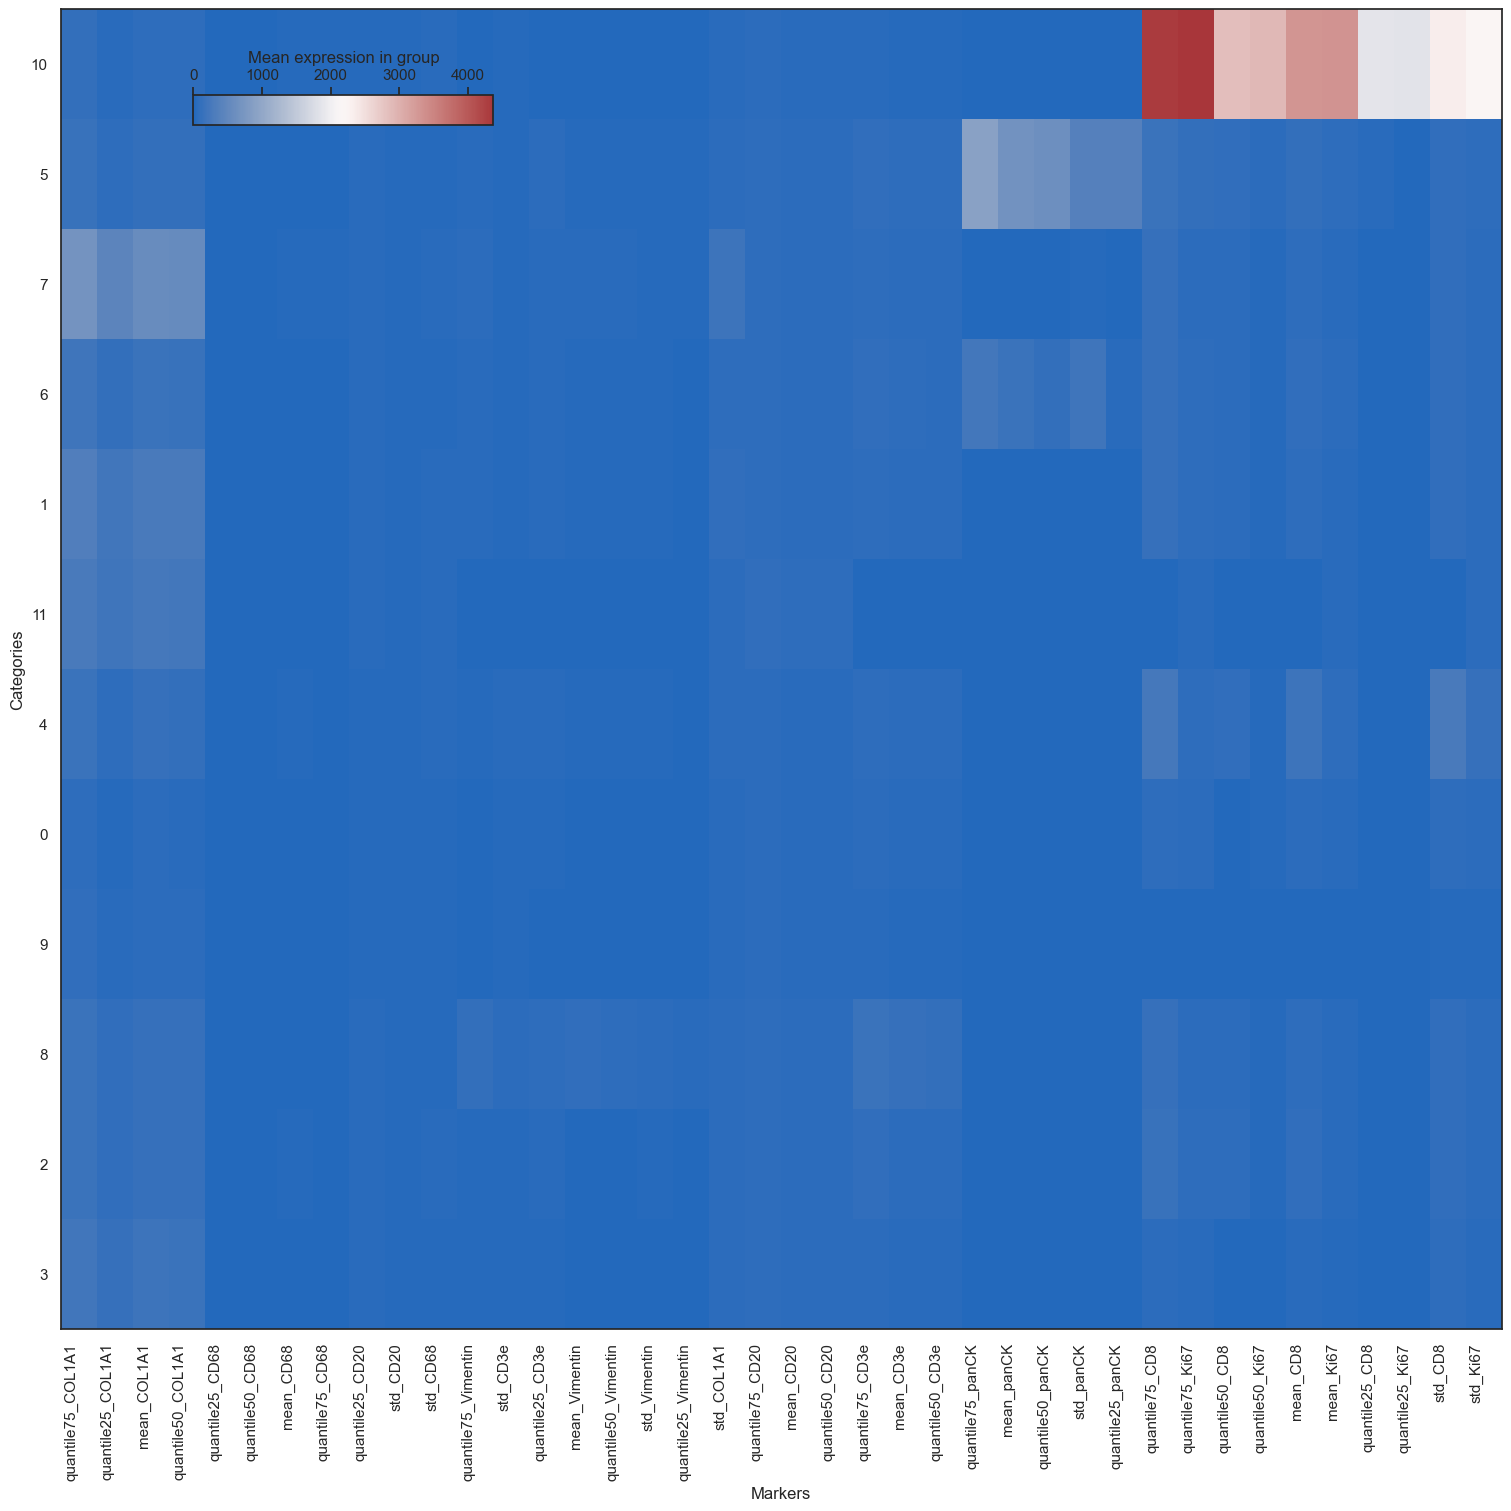

In [43]:
sm.pl.heatmap(adata, groupBy='leiden', figsize=(15,15), saveDir=None, fileName=None)

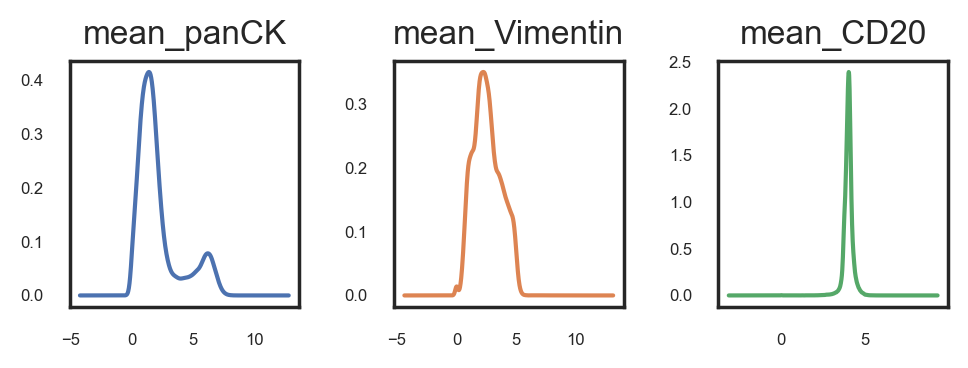

In [45]:
sm.pl.distPlot(adata, layer='log', markers=['mean_panCK','mean_Vimentin','mean_CD20'], ncols=3, fontsize=6, figsize=(5,2))

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning:

All-NaN slice encountered

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning:

All-NaN slice encountered



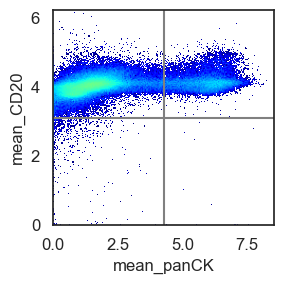

In [46]:
sm.pl.densityPlot2D(adata, markerA='mean_panCK', markerB='mean_CD20', layer='log')

In [47]:
import tifffile

In [56]:
def lazy_image_check(image_path):
    with tifffile.TiffFile(image_path) as image:
        # Getting the metadata
        shape = image.series[0].shape
        dtype = image.pages[0].dtype

        n_elements = np.prod(shape)
        bytes_per_element = dtype.itemsize
        estimated_size_bytes = n_elements * bytes_per_element
        estimated_size_kb = estimated_size_bytes / 1024
        estimated_size_mb = estimated_size_kb / 1024
        estimated_size_gb = estimated_size_mb / 1024
        
        print(f"Image shape is {shape}")
        print(f"Image data type: {dtype}")
        print(f"Estimated size: {estimated_size_gb:.4g} GB")


In [57]:
lazy_image_check("/Volumes/ag_coscia/Jose/P26_BCCN/P26E04_rerun_990_1002/1002_m150_s2/background/1002_m150_s2_backsub.ome.tif")

Image shape is (15, 48214, 92041)
Image data type: uint16
Estimated size: 124 GB


In [ ]:
# potential cuts:
# scale to 8bit 
# remove first 5 channels
# pyramidize

In [58]:
import dask_image.imread
import dask_image.ndfilters

ModuleNotFoundError: No module named 'dask_image'